In [1]:
from google.colab import drive
import sys

drive.mount('/content/gdrive')
gdrive_path = "/content/gdrive/MyDrive/AIM/"
sys.path.append(gdrive_path)
!ls -l /content/gdrive/MyDrive/AIM/citizen*.txt
import aim_util

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
-rw------- 1 root root 2696 Apr 15 14:07 /content/gdrive/MyDrive/AIM/citizen_1864_20240414_213308040_groundtruth.txt
-rw------- 1 root root 2696 May  2 20:40 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_annotated.txt
-rw------- 1 root root 3899 May 22 18:53 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list_lower.txt
-rw------- 1 root root 3899 May 22 18:53 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list.txt
-rw------- 1 root root 3899 May 22 18:53 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_string_lower.txt
-rw------- 1 root root 3899 May 22 18:53 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_string.txt
-rw------- 1 root root 3778 May 23 15:41 /content/gdrive/MyDrive/AIM/citizen_1864_xform0_carlv_word_list.txt
-rw------- 1 root root 2425 May 23 15:41 /content/gdrive/MyDrive/AIM/citizen_1864_xform

In [2]:
!pip install keras_ocr

In [3]:
import aim_scanner

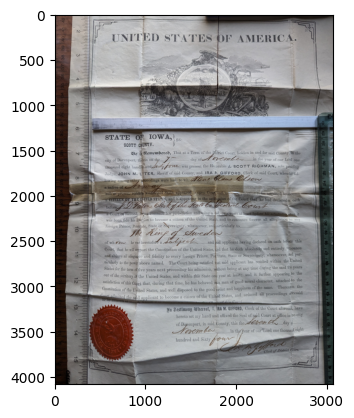

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg'

img = mpimg.imread(image_path)
plt.imshow(img)

In [ ]:
# import keras_ocr
# import math

# pipeline_OCR = keras_ocr.pipeline.Pipeline()

# def Detect(image_path,pipeline):
#     """OCR for text detection"""


#     # Read in image path
#     read_image = keras_ocr.tools.read(image_path)
#     # prediction_groups is a list of (word, box) tuples
#     prediction_groups = pipeline.recognize([read_image])
#     return prediction_groups[0]

# def Distance(predictions):
#     """
#     Returns dictionary with (key,value):

#     """

#     # Point of origin
#     x0, y0 = 0, 0
#     # Generate dictionary
#     detections = []
#     for group in predictions:

#         # Get center point of bounding box
#       top_left_x, top_left_y = group[1][0]
#       bottom_right_x, bottom_right_y = group[1][1]
#       center_x = (top_left_x + bottom_right_x) / 2
#       center_y = (top_left_y + bottom_right_y) / 2
#       # Use the Pythagorean Theorem to solve for distance from origin
#       distance_from_origin = math.dist([x0,y0], [center_x, center_y])
#       # Calculate difference between y and origin to get unique rows
#       distance_y = center_y - y0
#       # Append all results
#       detections.append({
#                           'text':group[0],
#                           'center_x':center_x,
#                           'center_y':center_y,
#                           'distance_from_origin':distance_from_origin,
#                           'distance_y':distance_y
#                       })
#     return detections

# def distinguish_rows(lst, thresh):
#     """Function to help distinguish unique rows"""

#     sublists = []
#     for i in range(0, len(lst)-1):
#         if lst[i+1]['distance_y'] - lst[i]['distance_y'] <= thresh:
#             if lst[i] not in sublists:
#                 sublists.append(lst[i])
#             sublists.append(lst[i+1])
#         else:
#             yield sublists
#             sublists = [lst[i+1]]
#     yield sublists


# def OCR(image_path, pipeline=pipeline_OCR, order='yes',thresh=6):
#     """
#     Function returns predictions in human readable order
#     from left to right & top to bottom
#     """
#     ordered_preds = []
#     predictions = Detect(image_path, pipeline)
#     #print(f"predictions (raw)->{predictions}")
#     predictions_2 = Distance(predictions)
#     #print(f"predictions_2->{predictions_2}")
#     longitud=len(predictions_2)
#     if longitud==1: ordered_preds= predictions_2[0]['text']
#     else:

#       predictions_3 = list(distinguish_rows(predictions_2, thresh))
#       #print(f"predictions_3->{predictions_3}")
#       # Remove all empty rows
#       predictions_3_f = list(filter(lambda x:x!=[], predictions_3))
#       #print(f"predictions_3_f->{predictions_3_f}")
#       # Order text detections in human readable format

#       ylst = ['yes', 'y']
#       for pr in predictions_3_f:
#           if order in ylst:
#               row = sorted(pr, key=lambda x:x['distance_from_origin'])
#               for each in row:
#                   ordered_preds.append(each['text'])
#     #print(f"ordered_preds->{ordered_preds}")

#     with open('texto.txt','a+') as f:
#       for word in ordered_preds:
#         f.write(word+' ')
#     text=''
#     for word in ordered_preds:

#       text=text+' '+word

#     #print(f"text->{text}")
#     return predictions, ordered_preds, text

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
# import pickle
# import numpy as np
# import pandas as pd

# def preds_to_pd(predictions):
#     data_list = []

#     for word, coords in predictions:
#         upper_left_X, upper_left_Y, lower_left_X, lower_left_Y, lower_right_X, lower_right_Y, upper_right_X, upper_right_Y = coords.flatten()
#         data_list.append([word, upper_left_X, upper_left_Y, lower_left_X, lower_left_Y, lower_right_X, lower_right_Y, upper_right_X, upper_right_Y])

#     df = pd.DataFrame(data_list, columns=['word', 'upper_left_X', 'upper_left_Y', 'lower_left_X', 'lower_left_Y', 'lower_right_X', 'lower_right_Y', 'upper_right_X', 'upper_right_Y'])
#     df = df.astype({col: np.float32 for col in df.columns[1:]})

#     return df

# def write_to_pickle(df, path):
#     """Write the DataFrame to a Pickle file (*.pkl) at the specified path"""
#     with open(path, 'wb') as f:
#         pickle.dump(df, f)
#         print(f"Dataframe successfully written to: {path}")

# def read_from_pickle(path):
#     """Read the Pickle file into a Pandas dataframe"""
#     with open(path, 'rb') as f:
#         return pickle.load(f)

# def write_preds_fileset(predictions, ordered_preds, word_preds, base_name):
#     aim_util.write_text(str(ordered_preds), gdrive_path + base_name + "_word_list.txt")
#     aim_util.write_text(word_preds, gdrive_path + base_name + "_word_string.txt")

#     preds_df = preds_to_pd(predictions)

#     pickle_path = gdrive_path + base_name + "_bbox.pkl"
#     write_to_pickle(preds_df, pickle_path)


In [6]:
# obtain keras OCR pipeine
pipeline_OCR = aim_scanner.get_pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
%%time
base_name = 'citizen_1864_xform0_carlv'
image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)

predictions, ordered_preds, word_preds = aim_scanner.OCR(image_path, pipeline_OCR, order='yes', thresh=16)

aim_scanner.write_preds_fileset(predictions, ordered_preds, word_preds, gdrive_path, base_name)

In [ ]:
%%time
base_name = 'citizen_1864_xform1_carlv'
image_path = '/content/gdrive/MyDrive/AIM/citizen_xform1.jpg'
aim_util.show_image(image_path)

predictions, ordered_preds, word_preds = aim_scanner.OCR(image_path, pipeline_OCR, order='yes', thresh=16)

aim_scanner.write_preds_fileset(predictions, ordered_preds, word_preds, gdrive_path, base_name)

In [ ]:
%%time
base_name = 'citizen_1864_xform2_carlv'
image_path = '/content/gdrive/MyDrive/AIM/citizen_xform2.jpg'
aim_util.show_image(image_path)

predictions, ordered_preds, word_preds = OCR(image_path, pipeline_OCR, order='yes', thresh=16)

aim_scanner.write_preds_fileset(predictions, ordered_preds, word_preds, gdrive_path, base_name)

In [ ]:
%%time
base_name = 'citizen_1864_xform3_carlv'
image_path = '/content/gdrive/MyDrive/AIM/citizen_xform3.jpg'
aim_util.show_image(image_path)

predictions, ordered_preds, word_preds = OCR(image_path, pipeline_OCR, order='yes', thresh=16)

aim_scanner.write_preds_fileset(predictions, ordered_preds, word_preds, gdrive_path, base_name)

In [ ]:
%%time
base_name = 'citizen_1864_xform4_carlv'
image_path = '/content/gdrive/MyDrive/AIM/citizen_xform4.jpg'
aim_util.show_image(image_path)

predictions, ordered_preds, word_preds = OCR(image_path, pipeline_OCR, order='yes', thresh=16)

aim_scanner.write_preds_fileset(predictions, ordered_preds, word_preds, gdrive_path, base_name)

In [ ]:
%%time
base_name = 'citizen_1864_xform5_carlv'
image_path = '/content/gdrive/MyDrive/AIM/citizen_xform5.jpg'
aim_util.show_image(image_path)

predictions, ordered_preds, word_preds = OCR(image_path, pipeline_OCR, order='yes', thresh=16)

aim_scanner.write_preds_fileset(predictions, ordered_preds, word_preds, gdrive_path, base_name)

In [ ]:
#####################################################################################################